## 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2.2 Data Preparation

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
# we will pass each column name as string.
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2.3 Exploratory Data Analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

#### Distribution of the price

<AxesSubplot:xlabel='msrp', ylabel='Count'>

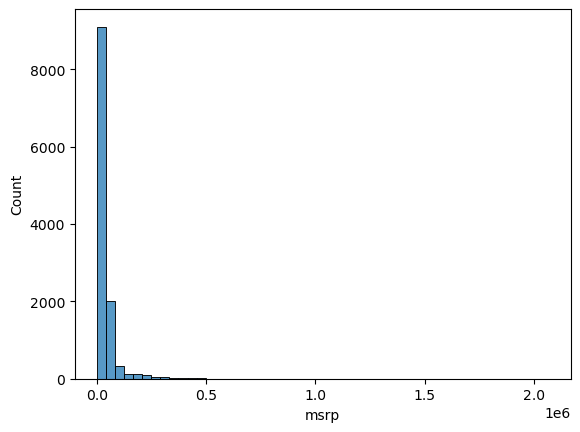

In [10]:
sns.histplot(df.msrp, bins = 50)

# Long tal distribution, meaning the are very few cars with high prices
# Not a very good option for a ML model, we want to get ride of the long tail

<AxesSubplot:xlabel='msrp', ylabel='Count'>

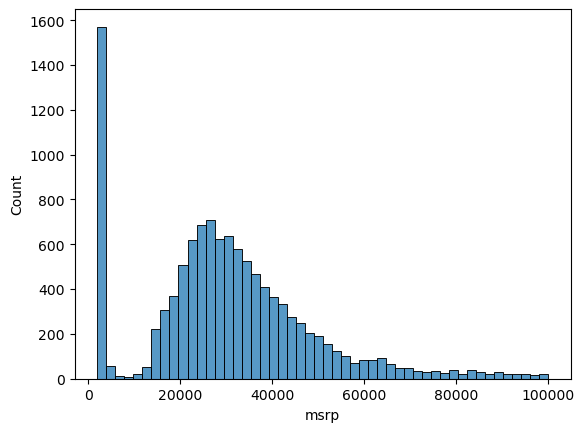

In [11]:
sns.histplot(df.msrp[df.msrp <100000], bins = 50)


In [12]:
np.log1p([1, 10, 1000, 100000])

array([ 0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [13]:
#if we have. zero, we need to add 1
np.log([0 + 1, 10 + 1, 1000 + 1, 100000 + 1])

array([ 0.        ,  2.39789527,  6.90875478, 11.51293546])

In [14]:
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

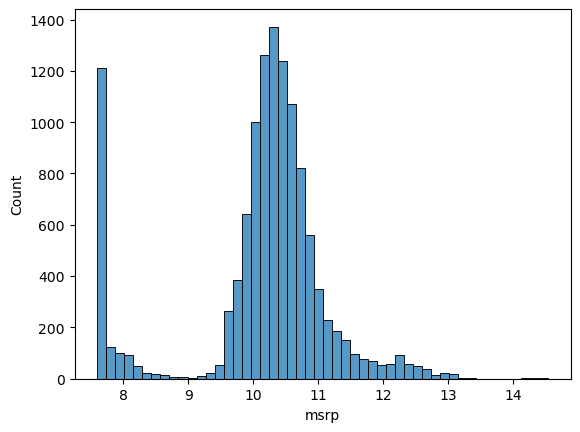

In [15]:
sns.histplot(price_logs, bins = 50)
#if the data shape of your target variable in your model
#resembles a normal distribution models do quite well.

#### Missing Values

In [16]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### 2.4 Exploratory Data Analysis

In [17]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_train, n_val, n_test

(7150, 2382, 2382)

In [18]:
#split our dataset
n, n_val + n_test + n_train

(11914, 11914)

In [19]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [20]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [21]:
np.random.seed(2)
np.random.shuffle(idx)

In [22]:
df_shuffled = df.iloc[idx]
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.0,6.0,automatic,rear_wheel_drive,3.0,NaN,midsize,cargo_van,18,13,1385,2052
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.0,4.0,automatic,all_wheel_drive,4.0,"crossover,hybrid",compact,4dr_suv,33,29,640,25995
6637,dodge,magnum,2006,regular_unleaded,250.0,6.0,automatic,all_wheel_drive,4.0,NaN,large,wagon,22,15,1851,29100
2575,honda,civic,2016,regular_unleaded,174.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,42,31,2202,22200


In [23]:
df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [24]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [25]:
df_train.reset_index()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
#Get our target variable y
#We will use df_train to create our feature matrix X
#We use log values
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [28]:
# delete the price or target variable y, to avoid using it in
# our feature matrix which will cause our model to be perfect

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [29]:
# we are able to use it, because we extracted the
# values before deleting the msrp
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

### 2.5 Linear Regression

#### With one simple example

In [30]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [31]:
#selecting enginehp, city_mpg, popularity
# apply the formula on a small feature vector with the size of three.
xi = [453, 11, 86]

In [32]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [33]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [34]:
lr_model = linear_regression(xi)
lr_model

12.312

In [35]:
#since we previously apply lognp1, we need to reverse it with exp, so we can know
#the price of the car

#so for this car the prediction is 222,348 with those features.
np.exp(lr_model)

222348.2221101062

In [36]:
# we do "-1" to undo the "+1" we did inside the log
np.expm1(lr_model)

222347.2221101062

In [37]:
np.exp(lr_model+1)

604405.1317520774

### 2.6 Linear Regression vector form 

#### 2.6.1 Example with one observation

In [38]:
xi, w, w0

([453, 11, 86], [0.01, 0.04, 0.002], 7.17)

In [39]:
def dot(xi, w):
    n=len(xi)
    
    res =0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        
    return res

In [40]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [41]:
linear_regression(xi)

12.312000000000001

In [42]:
#Alternatively, if xi and w are NumPy arrays, we can use
#the built-in dot method for multiplication:

def linear_regression(xi):
    return w0 + np.array(xi).dot(w)

In [43]:
linear_regression(xi)

12.312000000000001

In [44]:
#weights
#to make even shorter we can combine w0 and w into one (n+1)-dimensional vector by
#prepending w0 to w right in front of w1:
w_new = [w0] + w

In [45]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
#features
#Because now w becomes a (n+1)-dimensional vector, we also need to adjust
#the feature vector xi so that the dot product between them still works.
#We can do this easily by adding a dummy feature xi0,
#which always takes the value 1
#[1] + xi

In [47]:
def linear_regression2(xi):
    xi = [1] + xi
    return dot(xi, w_new)


In [48]:
linear_regression2(xi)

12.312

#### 2.6.2 Example with multiple observation

In [49]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [50]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array([X])

In [51]:
def linear_regression(X):
    return X.dot(w_new)

In [52]:
linear_regression(X)

array([[12.38 , 13.552, 12.312]])

### 2.7 Train a linear regression

Gram matrix to get w (weights) as close as possible
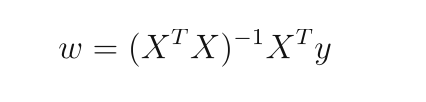

In [53]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [54]:
#add bias W0
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
Xones = np.column_stack([ones, X])

In [56]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

In [57]:
XTX = Xones.T.dot(Xones)

In [58]:
XTX_inv = np.linalg.inv(XTX)

In [59]:
#comprobation, mutlplication between them give us an identity matrix
#XTX.dot(XTX_inv).round(1)

In [60]:
w_full = XTX_inv.dot(Xones.T).dot(y)
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [61]:
w0 = w_full[0]
w = w_full[1:]

In [62]:
w0, w

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

In [63]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0]) #we add an additional column of ones, since we merge w0 tu our weights vector 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
train_linear_regression(X,y)

(300.06776692555593, array([-0.22774253, -2.5769413 , -0.02301206]))

### 2.8 Car price baseline model

In [65]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [66]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

In [67]:
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [68]:
X_train = df_train[base].values

In [69]:
df_train[base].isna().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [70]:
X_train = df_train[base].fillna(0).values

In [71]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [72]:
#after we train the model it provide us the weights
#that we are going to apply to a feature matrix to make predictions
W0, w = train_linear_regression(X_train, y_train)
W0,w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [73]:
y_pred = W0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

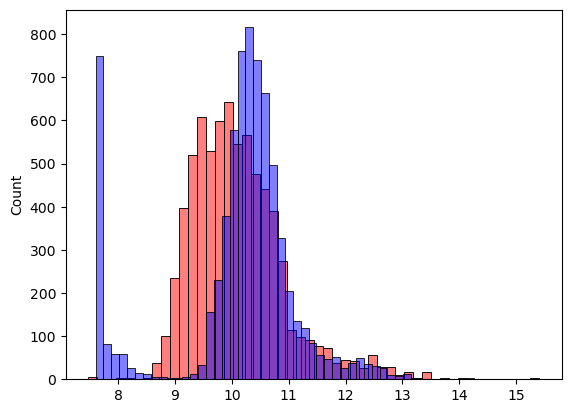

In [74]:
sns.histplot(y_pred, color='red', alpha= 0.5, bins=50)
sns.histplot(y_train, color='blue', alpha= 0.5, bins=50)

In [75]:
from hashlib import sha1

def compute_hash(email):
    return sha1(email.lower().encode('utf-8')).hexdigest()

### 2.9 RMSE

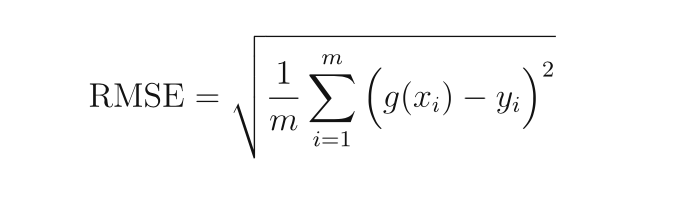

In [76]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error**2
    mse = se.mean()
    return np.sqrt(mse)

In [77]:
rmse(y_train, y_pred)

0.7554192603920132

###  2.10 Validating the model

In [78]:
#any dataset, not validation or testing dataset
#the idea of this function is we have the same way of
#preparing the data, regrdless if is validation, testing
#or training dataset
def prepare_X(df):
    df_num = df[base] #get numerical values
    df_num = df_num.fillna(0) #fill nans
    X = df_num.values #create feature matrix
    return X

In [79]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

### 2.11 Simple feature engineering 

In [80]:
#Study made on 2017, we substract to know how old is the car
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [81]:
def prepare_X(df):
    df = df.copy() #this wasy we avoid altering the df_train, it will work with a copy instead
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features] #get numerical values
    df_num = df_num.fillna(0) #fill nans
    X = df_num.values #create feature matrix
    return X

In [82]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


In [83]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

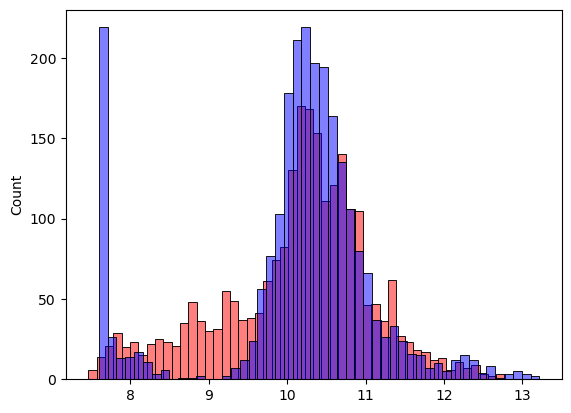

In [84]:
sns.histplot(y_pred, color='red', alpha= 0.5, bins=50)
sns.histplot(y_val, color='blue', alpha= 0.5, bins=50)

### 2.12 Categorical variables

In [85]:
#Variables that are not numerical, they are categories
#However, number of doors is not 
#a numerical one, it just happens that the values
#are numbers
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [86]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [87]:
def prepare_X(df):
    df = df.copy() #this wasy we avoid altering the df_train, it will work with a copy instead
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s'% v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    df_num = df[features] #create df with numerical and categorical variables
    df_num = df_num.fillna(0) #fill nans
    X = df_num.values #create feature matrix
    
    return X

In [88]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [89]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502352

In [90]:
makes = list(df.make.value_counts().head().index)

In [91]:
def prepare_X(df):
    df = df.copy() #this wasy we avoid altering the df_train, it will work with a copy instead
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s'% v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s'% v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    df_num = df[features] #create df with numerical and categorical variables
    df_num = df_num.fillna(0) #fill nans
    X = df_num.values #create feature matrix
    
    return X

In [92]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557034

In [93]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [94]:
categories = {}
for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [95]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [96]:
def prepare_X(df):
    df = df.copy() #this wasy we avoid altering the df_train, it will work with a copy instead
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values: 
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features] #create df with numerical and categorical variables
    df_num = df_num.fillna(0) #fill nans
    X = df_num.values #create feature matrix
    
    return X

In [97]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

23.370682839235876

In [98]:
w0, w

(8076722330785280.0,
 array([ 2.19613378e-01, -1.23924815e+01, -1.55565980e-01,  1.72019346e+00,
        -7.48030012e-04,  8.57866963e-01,  1.10007186e+03,  1.10703242e+03,
         1.08970027e+03, -1.64182016e+00,  8.70500716e-01,  1.40383685e+00,
        -5.06840411e+00,  1.74186165e+00,  9.89781234e+01,  8.76598208e+01,
         9.34493805e+01,  9.43490986e+01,  1.07661838e+02, -6.54670381e+15,
        -6.54670381e+15, -6.54670381e+15, -6.54670381e+15, -6.54670381e+15,
        -1.53001852e+15, -1.53001852e+15, -1.53001852e+15, -1.53001852e+15,
         2.69409282e+00,  8.23531258e-01,  7.64925861e-01, -7.08728902e-02,
        -6.58368806e+00,  1.12149550e+01,  1.25863344e+01,  1.72957401e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

### 2.13 Regularization

#### Regularization means to control our weights don't grow to much.
#### Why our RMSE is very high - means that our wieghts are vey high. Why happens? it could means that some columns are duplicated qn the inverse of a duplicate

In [99]:
X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [100]:
#The inverse do not exists, since in Linear Algebra
# One column is a linear combination of other columns
# Which means that is possible to express col number 3
#with other columns of the matrix
X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [101]:
#Other reason could be that our matrix has noise.
#Numbers with a lot of decimals

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [102]:
y = [1,2,3,1,2,3]

In [103]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [104]:
XTX_inv = np.linalg.inv(XTX)

In [105]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

In [106]:
#What we can do is add a small number call it alpha
#on the diagonal

#the larger the numbers we add to the diagonal
#the more we have these weights under control (lower weights)

In [107]:
XTX = [
    [1,2,2],
    [2,1,1.0000001],
    [2,1.0000001,1], 
]

XTX = np.array(XTX)

In [108]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [109]:
XTX = XTX + 0.1 * np.eye(3)
XTX

array([[1.1      , 2.       , 2.       ],
       [2.       , 1.1      , 1.0000001],
       [2.       , 1.0000001, 1.1      ]])

In [110]:
np.linalg.inv(XTX)

array([[-0.36906857,  0.35149386,  0.35149386],
       [ 0.35149386,  4.90334419, -5.09666581],
       [ 0.35149386, -5.09666581,  4.90334419]])

In [111]:
XTX.shape[0]

3

In [112]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0]) #we add an additional column of ones, since we merge w0 tu our weights vector 
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [113]:
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=.001)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565175086998797

### 2.14 Tuning the model

In [114]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:

    #Train part
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    #Validation part
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 8076722330785280.0 23.370682839235876
1e-05 8.796876877765598 0.4565170168175915
0.0001 6.33106628120822 0.4565170633148812
0.001 6.285517742466579 0.4565175086998797
0.1 6.191208658848039 0.4565692763039577
1 5.634896667867927 0.45722043179962046
10 4.283980108970553 0.470145693209949


In [115]:
r = 0.001
#Train part
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

#Validation part
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

0.4565175086998797

### 2.15 Test dataset (using the mode)

In [116]:
df_full_train = pd.concat([df_train, df_val])
#reset index from validation dataset
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [117]:
y_full_train = np.concatenate([y_train, y_val])

In [118]:
r = 0.001
#Train part
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

#Validation part
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

0.45222847237506386

In [119]:
w0, w

(6.285517742466579,
 array([ 1.74600249e-03,  1.10332142e-01, -5.11237449e-03, -5.92343272e-03,
        -5.03741010e-05, -9.62098425e-02, -7.88729146e-01, -8.93190489e-01,
        -6.20240826e-01, -4.23875982e-02,  1.77110977e-01,  1.38410049e-02,
        -9.97730667e-02, -1.07727258e-01, -4.61074097e-01,  6.91522025e-02,
        -3.27257190e-01, -5.40102830e-01, -9.20164639e-02,  1.09409065e+00,
         9.24550020e-01,  1.15486763e+00,  2.62174780e+00,  4.90974532e-01,
         1.60746158e+00,  1.53729273e+00,  1.60043879e+00,  1.54045758e+00,
        -8.49915451e-02,  4.57085001e-02, -4.80505494e-02, -3.56645196e-02,
         8.59610941e-03,  2.18059690e+00,  2.06544345e+00,  2.03959876e+00,
        -4.85503714e-02,  5.44848713e-02,  1.78239216e-01,  3.41908082e-01,
        -1.64425789e-01]))

In [120]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [121]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [122]:
X_small = prepare_X(df_small)

In [123]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.44284961976717

In [124]:
predicted_price = np.expm1(y_pred)
predicted_price

34297.25028546047

In [125]:
y_test[20]

10.463131911491967

In [126]:
actual_price = np.expm1(y_test[20])
actual_price

35000.00000000001

In [127]:
predicted_price - actual_price

-702.7497145395391